In [67]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt 
import seaborn as sns

In [68]:
red_df = pd.read_csv('resources/winequality-red.csv',sep=';')
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:
red_df.shape


(1599, 12)

In [70]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [71]:
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [72]:
red_df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

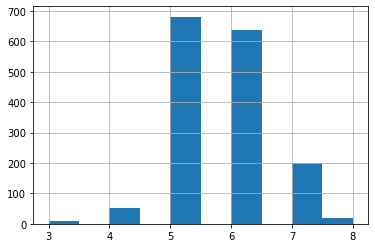

In [73]:
red_df.quality.hist()

In [74]:
# bins = (2, 6.5, 8)
# group_names = [0,1] # poor quality = 0, good quality = 1
# red_df['quality_bin'] = pd.cut(red_df['quality'], bins = bins, labels = group_names)
# red_df.head(10)

In [75]:
# poor quality = 0, good quality = 1
red_df['quality'] = red_df['quality'].apply(lambda qual: 1 if qual>=6.5 else 0) 


In [76]:
red_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [77]:
red_df.duplicated().sum()

240

In [117]:
X = red_df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [79]:
y = LabelEncoder().fit_transform(red_df['quality'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Logistic Regression


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
red_w = LogisticRegression(max_iter=10000, random_state = 42).fit(X_train, y_train)

In [95]:
print(f"Training Data Score: {red_w.score(X_train, y_train)}")
print(f"Testing Data Score: {red_w.score(X_test, y_test)}")

Training Data Score: 0.8807339449541285
Testing Data Score: 0.8725


In [118]:
target_names = ["poor", "good"]

In [119]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = red_w.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        poor       0.89      0.97      0.93       347
        good       0.54      0.25      0.34        53

    accuracy                           0.87       400
   macro avg       0.72      0.61      0.63       400
weighted avg       0.85      0.87      0.85       400



In [120]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.8725
Precision: 0.5416666666666666
Sensitivity: 0.24528301886792453


Text(0.5, 257.44, 'Predicted label')

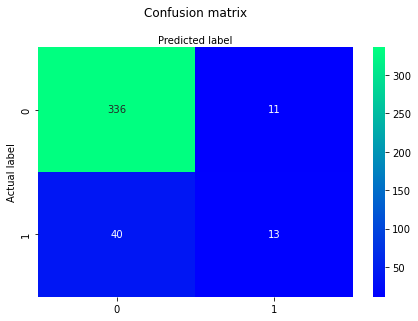

In [121]:
class_names=["good_wine","poor_wine"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="winter" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

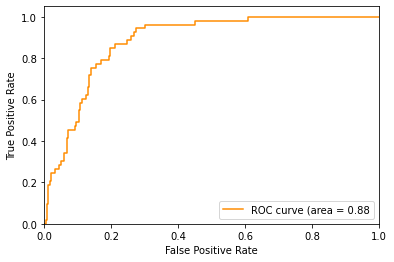

In [122]:
y_pred_proba = red_w.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### RandomForestRegression Model¶

RandomForestRegression Model is considered as a highly accurate method, but is slower in generating predictions. Multiple decision trees are used to determine the final output - the average of all the tree outputs is considered as the final result, which gives more accurate and stable prediction. we predict that it will fit better to our dataset with multiple features.

In [123]:
ran = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X, y)
y_r_pred = ran.predict(X_test)
y_true = y_test
cm_r = confusion_matrix(y_true, y_r_pred)
cm_r

print(classification_report(y_true, y_r_pred, target_names=target_names))
cm_r

              precision    recall  f1-score   support

        poor       1.00      1.00      1.00       347
        good       1.00      1.00      1.00        53

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



array([[347,   0],
       [  0,  53]], dtype=int64)